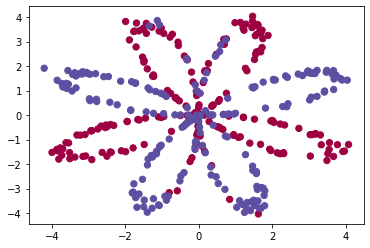

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model


X, Y = load_planar_dataset() 
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);
#tacke podataka, noja odredjuje njuhovu klasu.treniramo neuronsku mrezu da odredi klasu podataka

In [ ]:
shape_X = X.shape 
shape_Y = Y.shape 
m = X.shape[1]  # training set size  
print ('The shape of X is: ' + str(shape_X)) 
print ('The shape of Y is: ' + str(shape_Y)) 
print ('I have m = %d training examples!' % (m))

from sklearn.model_selection import train_test_split
def my_splitter(X,Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X.T, Y.T, test_size=0.3, random_state=1)
    X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T
    return X_train, X_test, Y_train, Y_test
X_train, X_test, Y_train, Y_test = my_splitter(X,Y)

In [ ]:
#Defining the size of each layer (input layer, hidden layer, output layer)
#Initialising weights and biases parameters
#Forward propagation
#Calculating cost function
#Backward propagation
#Updating weights and biases
#Prediction

In [ ]:
def layer_sizes(X, Y):
    n_x = X.shape[0] # size of input layer
    n_h = 4 # size of hidden layer
    n_y = Y.shape[0] # size of output layer
    return (n_x, n_h, n_y)

In [42]:
n_x, n_h, n_y = layer_sizes(X_train, Y_train)
initialize_parameters(n_x, n_h, n_y)

{'W1': array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
 'W2': array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'b2': array([[0.]])}

In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2 = np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [ ]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
 
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache
  

In [ ]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    logprobs = np.multiply(np.log(A2),Y) + np.multiply(np.log(1-A2),1-Y)
    cost = - np.sum(logprobs) * (1./m)
    cost = np.squeeze(cost)     # makes sure cost is the dimension we expect. 
                                # E.g., turns [[17]] into 17 
    assert(isinstance(cost, float))
    
    return cost

In [ ]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    A1 = cache["A1"]
    A2 = cache["A2"]
    dZ2 = A2-Y
    dW2 = 1./m*(np.dot(dZ2,A1.T))
    db2 = (1./m)*np.sum(dZ2,axis=1,keepdims=True)
    dZ1 = np.dot(W2.T,dZ2) * (1-np.power(A1,2))
    dW1 = (1./m)*np.dot(dZ1,X.T)
    db1 = (1./m)*np.sum(dZ1,axis=1,keepdims=True)
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads


In [ ]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters


In [ ]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [ ]:
nn_model(X_train, Y_train, 4, num_iterations=10000, print_cost=True)

Cost after iteration 0: 0.693069
Cost after iteration 1000: 0.286010
Cost after iteration 2000: 0.266050
Cost after iteration 3000: 0.255908
Cost after iteration 4000: 0.250042
Cost after iteration 5000: 0.246246
Cost after iteration 6000: 0.243599
Cost after iteration 7000: 0.241648
Cost after iteration 8000: 0.240151
Cost after iteration 9000: 0.238967


{'W1': array([[ -0.28523244,  -8.06341484],
        [-10.69022014,  13.57000487],
        [  1.6633959 ,  -2.45291602],
        [-11.58666726, -13.67997228]]),
 'W2': array([[-11.85712656,  -6.36439736,   2.96736103,   7.0382314 ]]),
 'b1': array([[-0.0287338 ],
        [ 0.04393198],
        [-7.79270217],
        [-0.12676703]]),
 'b2': array([[2.53302337]])}

In [ ]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

Accuracy for 1 hidden units: Train set 65.71%,  Test set 61.67%
Accuracy for 2 hidden units: Train set 65.71%,  Test set 65.83%
Accuracy for 3 hidden units: Train set 90.36%,  Test set 86.67%
Accuracy for 4 hidden units: Train set 90.00%,  Test set 86.67%
Accuracy for 5 hidden units: Train set 90.00%,  Test set 90.83%
Accuracy for 20 hidden units: Train set 90.36%,  Test set 90.83%
Accuracy for 50 hidden units: Train set 92.86%,  Test set 85.83%


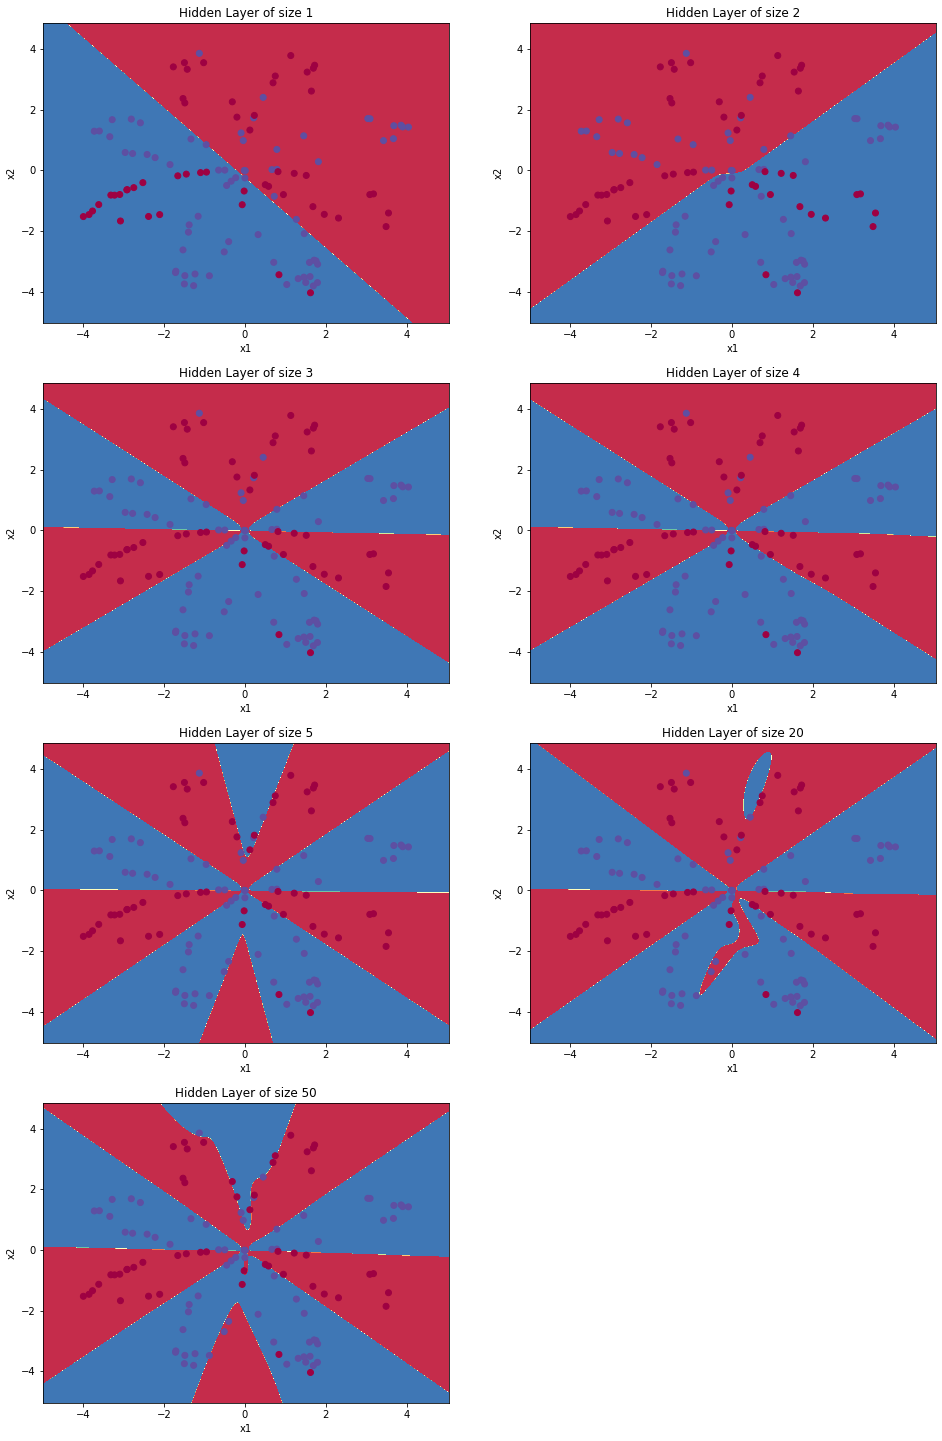

In [45]:
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
def hl_comparison_plotter(X_train, X_test, Y_train, Y_test):
    plt.figure(figsize=(16, 32))
    for i, n_h in enumerate(hidden_layer_sizes):
        plt.subplot(5, 2, i+1)
        plt.title('Hidden Layer of size %d' % n_h)
        parameters = nn_model(X_train, Y_train, n_h, num_iterations = 5000)
        plot_decision_boundary(lambda x: predict(parameters, x.T), X_test, Y_test)
        train_predictions = predict(parameters, X_train)
        test_predictions = predict(parameters, X_test)
        train_accuracy = float((np.dot(Y_train,train_predictions.T) + np.dot(1-Y_train,1-train_predictions.T))/float(Y_train.size)*100)
        test_accuracy = float((np.dot(Y_test,test_predictions.T) + np.dot(1-Y_test,1-test_predictions.T))/float(Y_test.size)*100)
        print ("Accuracy for {} hidden units: Train set {:.2f}%,  Test set {:.2f}%".format(n_h, train_accuracy, test_accuracy))
hl_comparison_plotter(X_train, X_test, Y_train, Y_test)